# USE OF NLP TO PRIORITIZE CUSTOMER SERVICE QUERIES

My dissertation focuses on the use of Natural Language Processing techniques and Machine Learning to improve customer service in banking institutions by advising customers and also prioritizing their requests, so I would be building a chatbot as well as performing sentiment analysis on the texts entered by the customer to the chatbot. For the chatbot I would be using WIT.AI api, for the sentiment analysis I would be using TextBlob and I would be using the python programming language. 

From the customer input entered, the intent is detected so as to generate the correct response text as well as perform sentiment analysis on the text entered using TextBlob to determine the priority of the query. Based on the priority of the query the system can then choose to transfer the query to a human agent.

## Conversation Flow Diagram

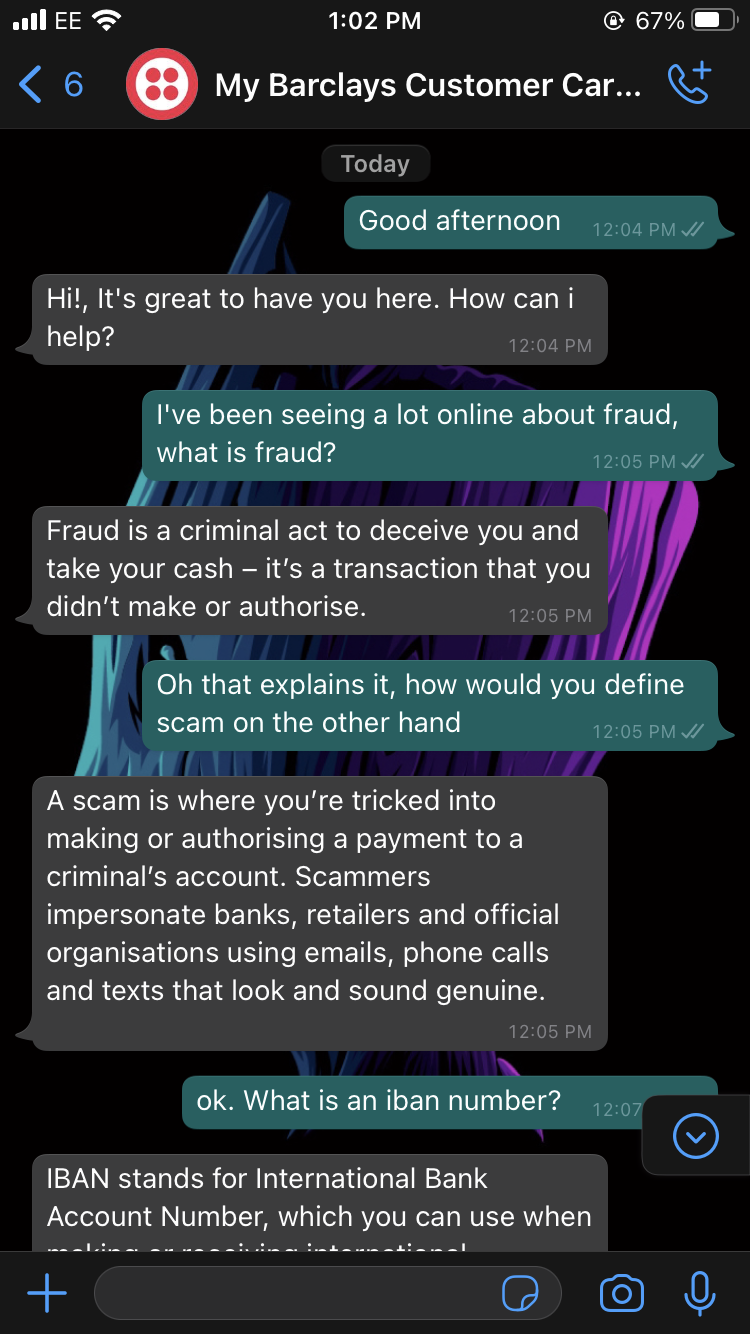
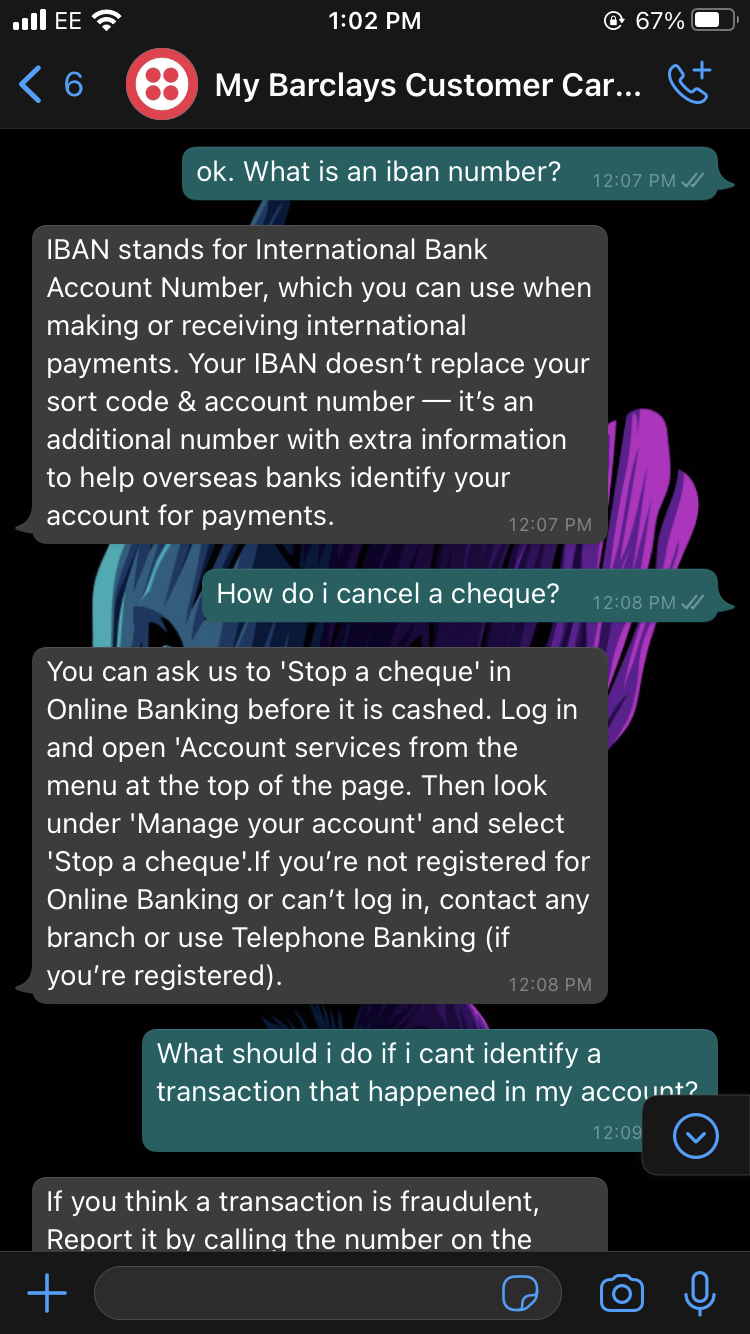
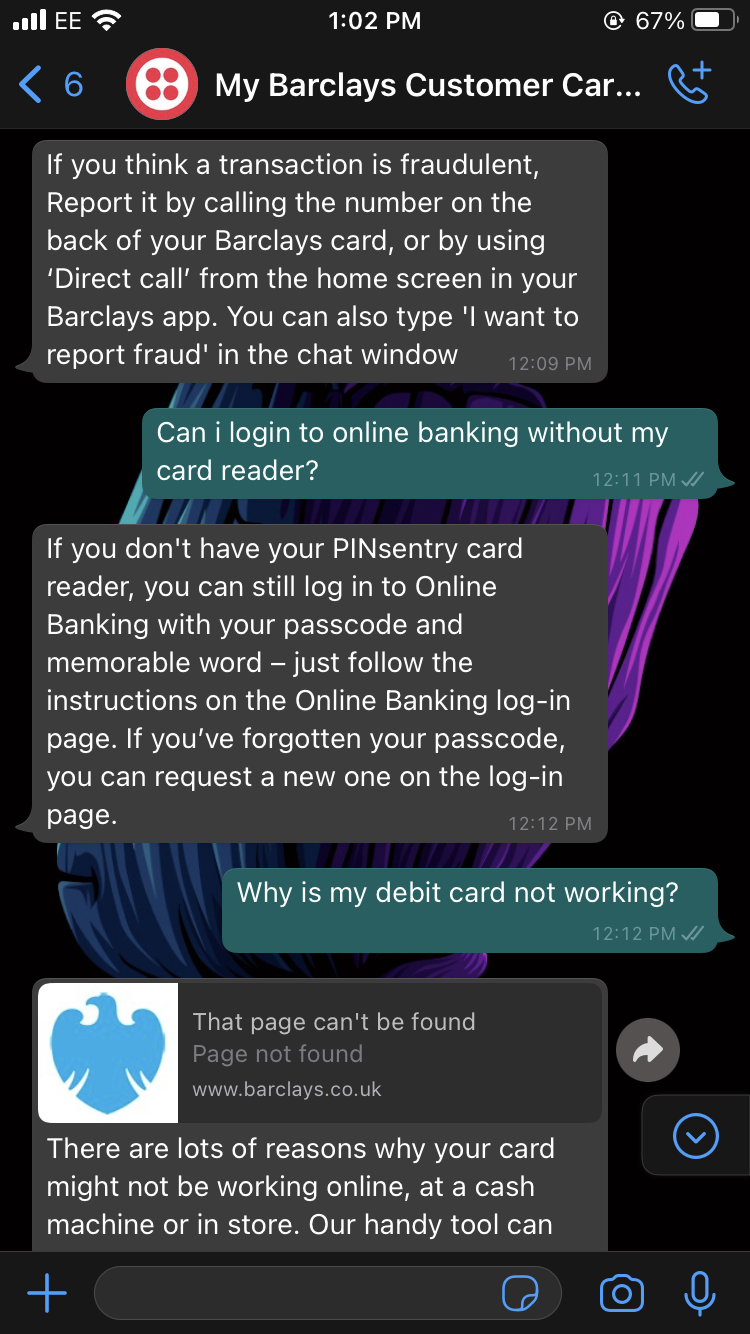
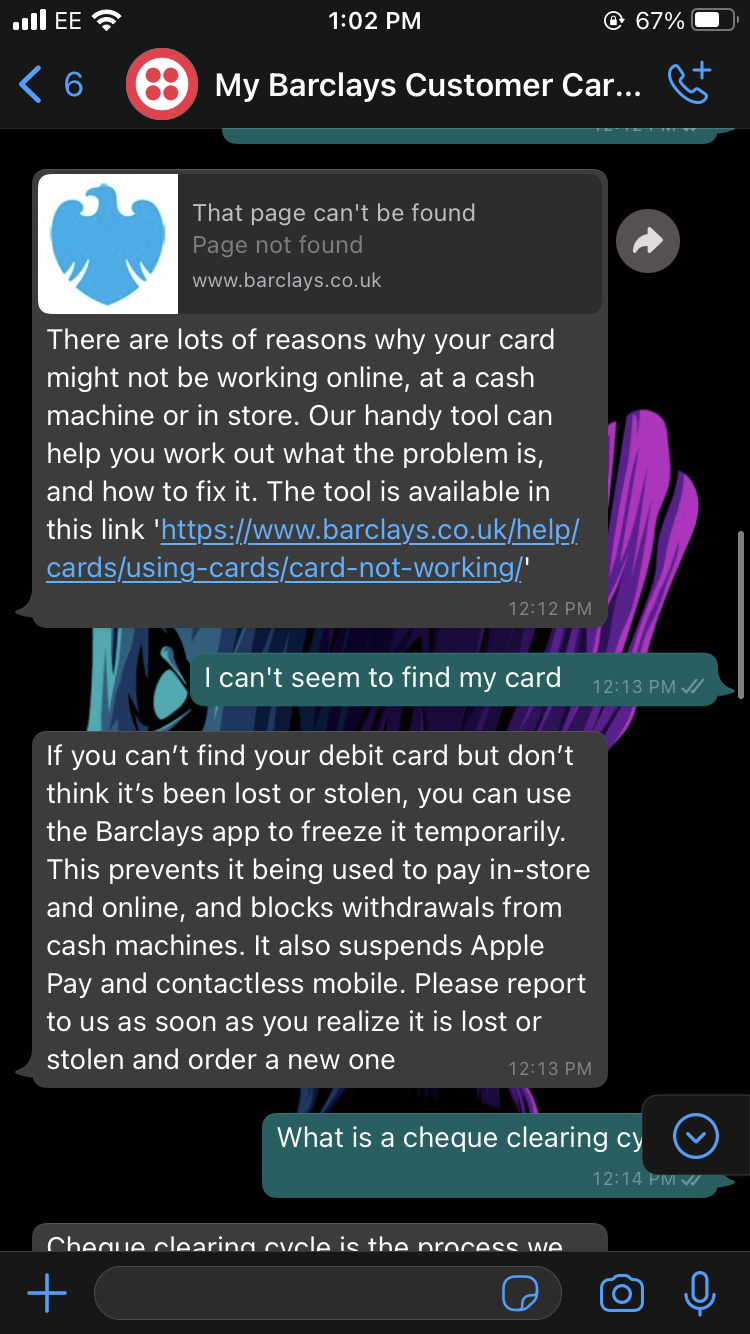
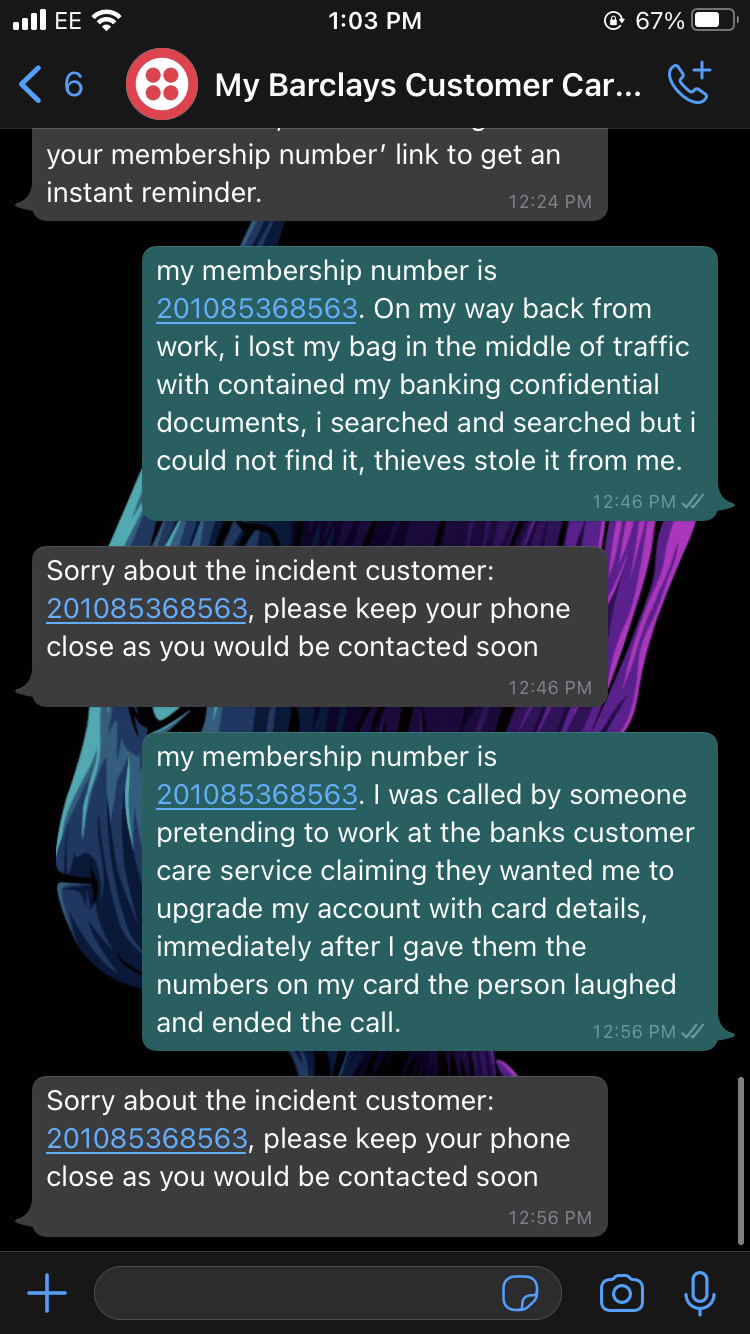
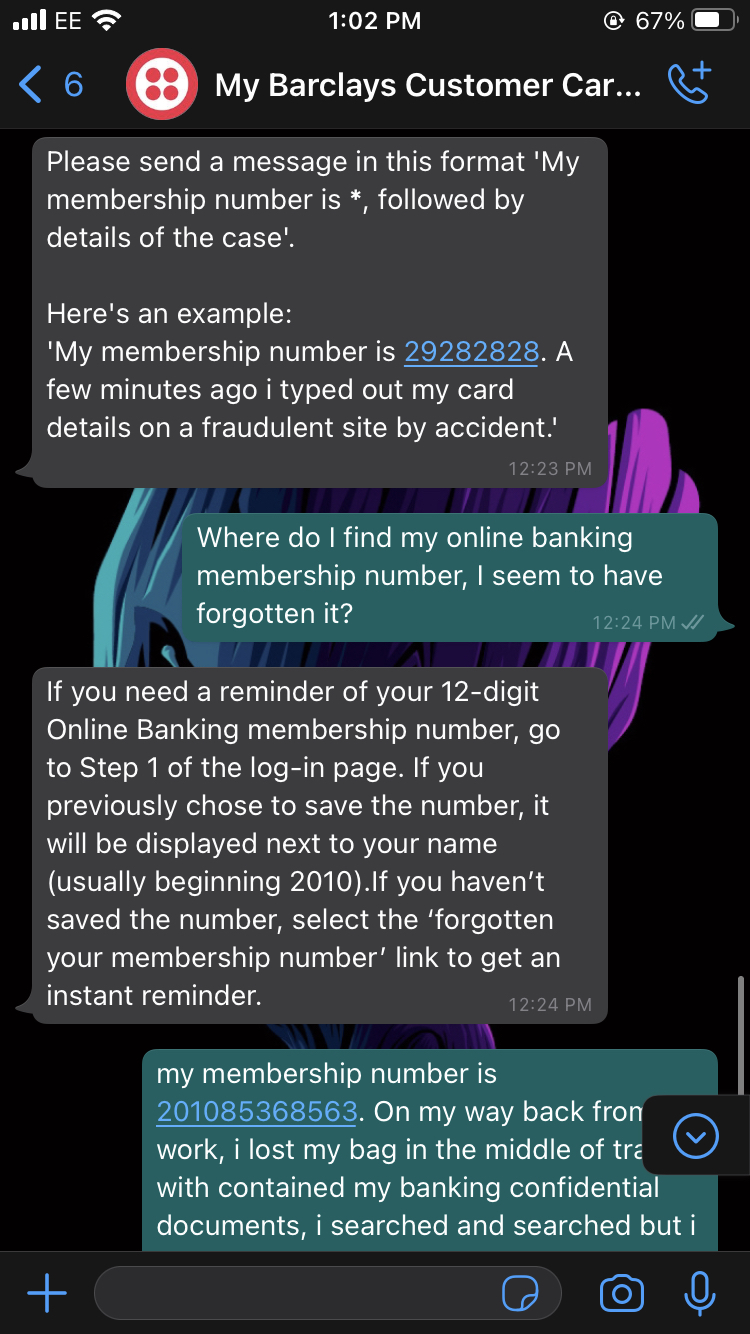
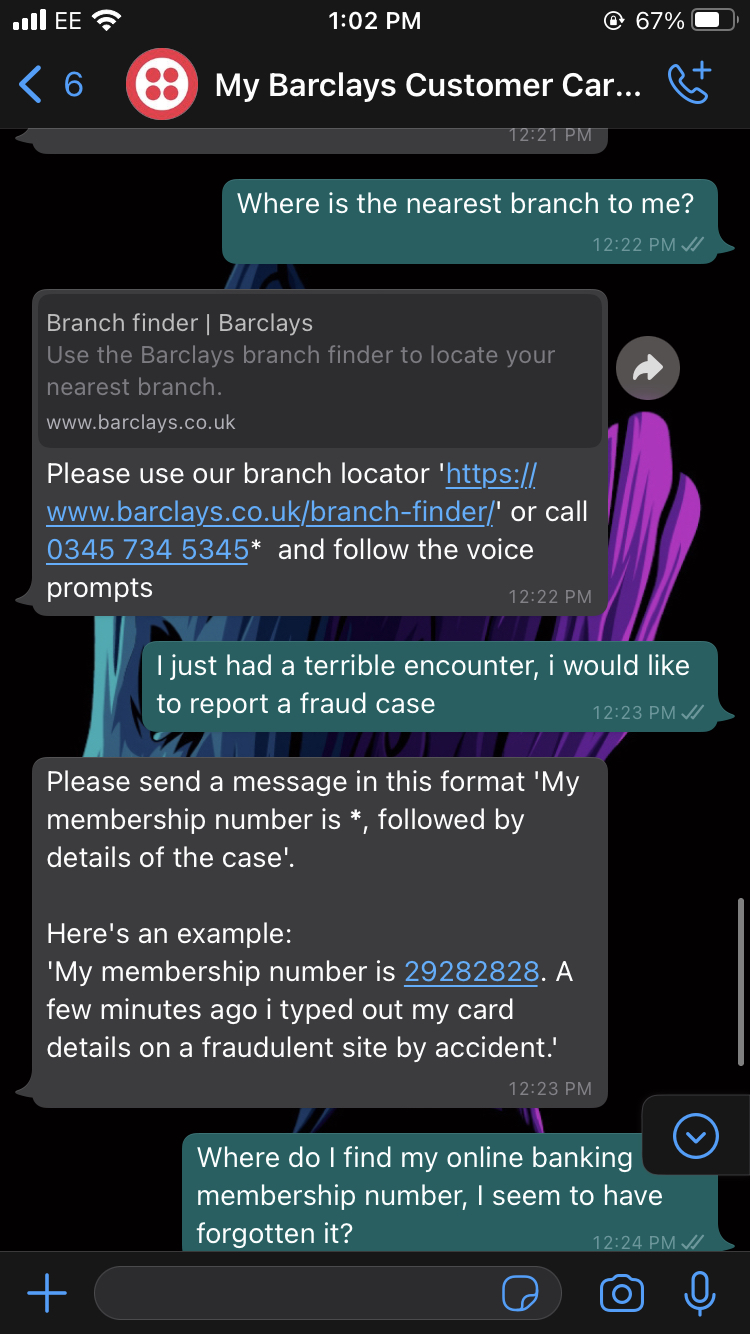
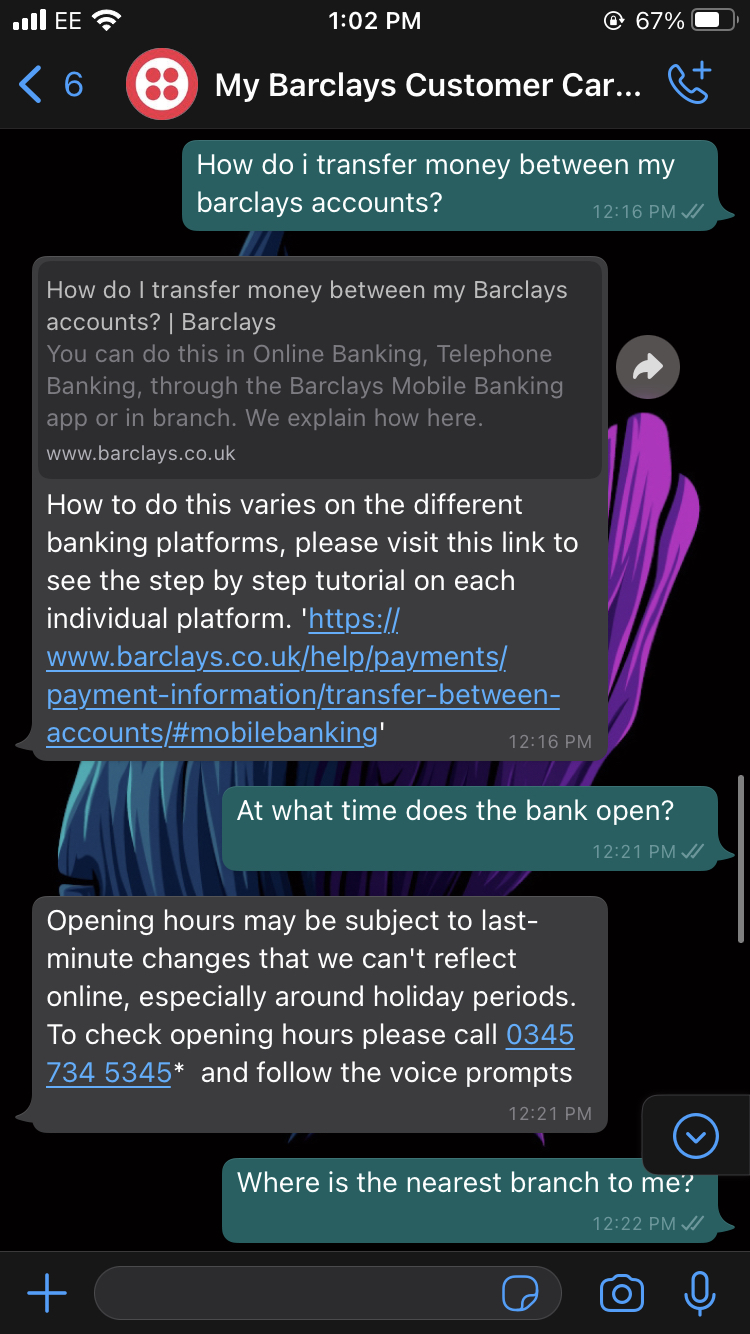
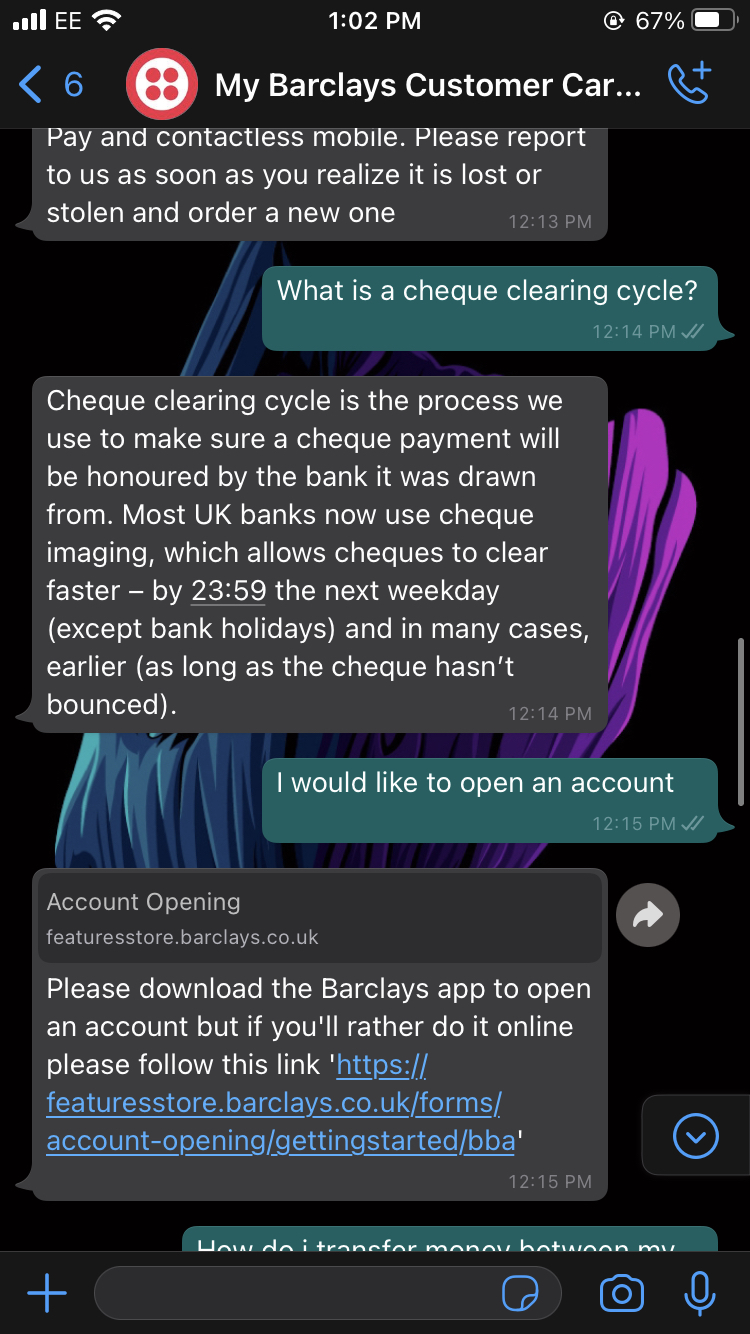
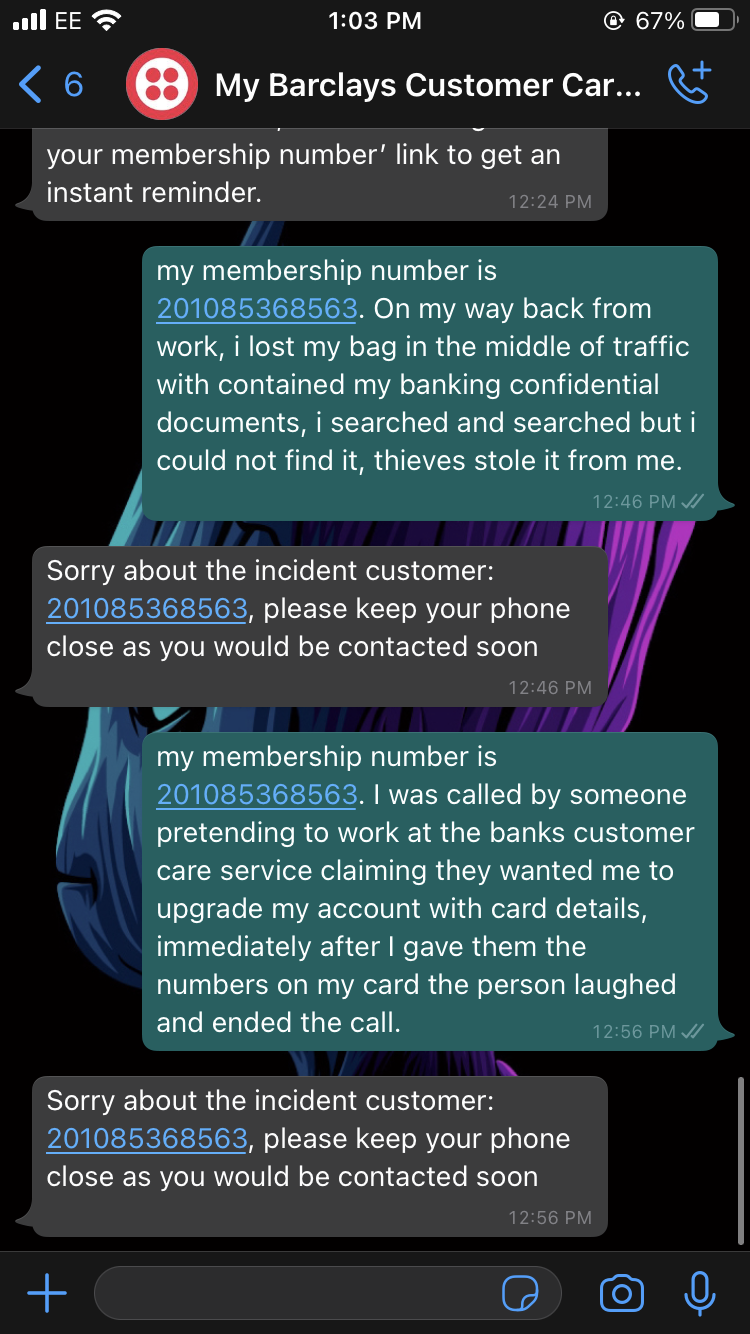

#conda install -c conda-forge textblob

pip install twilio flask requests

In [1]:
from flask import Flask, request

In [2]:
from twilio.twiml.messaging_response import MessagingResponse

In [3]:
from textblob import TextBlob

In [4]:
import smtplib

In [5]:
from wit import Wit

client = Wit('HR5VEP7PYO3EYFFAX52BLMSD744EJZT7')

In [6]:
from email.message import EmailMessage

## DECLARATION OF FUNCTION TO REPLY THE CLIENT BASED ON INTENT

In [7]:
def reply_client(r):
  
  if r.get('intents'):
    intent = r.get('intents')[0].get('name')
    if intent == 'greeting':
        responseText = greet_client()
        return responseText
    elif intent == 'define_fraud':
        responseText = define_fraud();
        return responseText
    elif intent == 'define_scam':
        responseText = define_scam();
        return responseText
    elif intent == 'define_IBAN':
        responseText = define_IBAN();
        return responseText
    elif intent == 'define_SWIFT':
        responseText = define_SWIFT();
        entryText = r.get('Text');
        return responseText
    elif intent == 'find_SORT_CODE':
        responseText = find_SORT_CODE();
        return responseText
    elif intent == 'cancel_a_cheque':
        responseText = cancel_a_cheque();
        return responseText
    elif intent == 'cant_identify_transaction':
        responseText = cant_identify_transaction();
        return responseText
    elif intent == 'bank_opening_hours':
        responseText = bank_opening_hours();
        return responseText
    elif intent == 'define_cheque_clearing_cycle':
        responseText = define_cheque_clearing_cycle();
        return responseText
    elif intent == 'find_online_banking_membership_number':
        responseText = find_online_banking_membership_number();
        return responseText
    elif intent == 'login_with_no_card_reader':
        responseText = login_with_no_card_reader();
        return responseText
    elif intent == 'transfer_money_between_my_barclays_accounts':
        responseText = transfer_money_between_my_barclays_accounts();
        return responseText
    elif intent == 'login_with_no_card_reader':
        responseText = login_with_no_card_reader();
        return responseText
    elif intent == 'card_not_working':
        responseText = card_not_working();
        return responseText
    elif intent == 'card_is_missing':
        responseText = card_is_missing();
        return responseText
    elif intent == 'report_fraud':
        responseText = report_fraud();
        return responseText
    elif intent == 'find_nearest_branch':
        responseText = find_nearest_branch()
        return responseText
    elif intent == 'gratitude':
        responseText = gratitude()
        return responseText
    elif intent == 'blocked_account':
        responseText = blocked_account()
        return responseText
    elif intent == 'report_case_details':
        statement_explained = (r).get('entities').get('detailed_report:detailed_report')[0].get('body')
        membership_number = (r).get('entities').get('wit$phone_number:phone_number')[0].get('body')
        if type(statement_explained)== 'NoneType':
            responseText = 'Invalid report details, please ensure report details are given and less than 200 characters'
        else:
            responseText = report_case_details(membership_number,statement_explained)
        return responseText
    elif intent == 'open_an_account':
        responseText = open_an_account()
        return responseText

In [8]:
def greet_client():
        return "Hi!, It's great to have you here. How can i help?"

In [9]:
def define_fraud():
        return "Fraud is a criminal act to deceive you and take your cash – it’s a transaction that you didn’t make or authorise. "

In [10]:
def gratitude():
        return "I'm glad i could be of assistance"

In [11]:
def open_an_account():
        return "Please follow this link to open an account 'https://www.barclays.co.uk/current-accounts/bank-account/'"

In [12]:
def blocked_account():
    return "Please call us on 0800 282 390* if you're in the UK or +44 (0)207 116 7488 if abroad to resolve this, you can also visit a branch near you"

In [13]:
def define_scam():
        return "A scam is where you’re tricked into making or authorising a payment to a criminal’s account. Scammers impersonate banks, retailers and official organisations using emails, phone calls and texts that look and sound genuine. "

In [14]:
def define_IBAN():
        return "IBAN stands for International Bank Account Number, which you can use when making or receiving international payments. Your IBAN doesn’t replace your sort code & account number ─ it’s an additional number with extra information to help overseas banks identify your account for payments."

In [15]:
def define_SWIFT():
        return "A SWIFT code (or SWIFTBIC, as it’s sometimes known) is a code that helps overseas banks identify which bank to send money to. For example, if an overseas bank is sending to a payment to your Barclays UK account, they’ll need to know our SWIFT code: BUKBGB22."

In [16]:
def find_SORT_CODE():
        return "On your Barclays debit card, your Sort Code (A six digit code) and Account number are usually on the front under your name, they can also be found on your bank account home page, cheques and on your bank statements. "

In [17]:
def cancel_a_cheque():
    return "You can ask us to 'Stop a cheque' in Online Banking before it is cashed. Log in and open 'Account services from the menu at the top of the page. Then look under 'Manage your account' and select 'Stop a cheque'."  "If you’re not registered for Online Banking or can’t log in, contact any branch or use Telephone Banking (if you’re registered)."

In [18]:
def cant_identify_transaction():
    return "If you think a transaction is fraudulent, Report it by calling the number on the back of your Barclays card, or by using ‘Direct call’ from the home screen in your Barclays app. You can also type 'I want to report fraud' in the chat window "


In [19]:
def define_cheque_clearing_cycle():
    return "Cheque clearing cycle is the process we use to make sure a cheque payment will be honoured by the bank it was drawn from. Most UK banks now use cheque imaging, which allows cheques to clear faster – by 23:59 the next weekday (except bank holidays) and in many cases, earlier (as long as the cheque hasn’t bounced)."


In [20]:
def find_online_banking_membership_number():
    return "If you need a reminder of your 12-digit Online Banking membership number, go to Step 1 of the log-in page. If you previously chose to save the number, it will be displayed next to your name (usually beginning 2010).If you haven’t saved the number, select the ‘forgotten your membership number’ link to get an instant reminder."

In [21]:
def login_with_no_card_reader():
    return "If you don't have your PINsentry card reader, you can still log in to Online Banking with your passcode and memorable word – just follow the instructions on the Online Banking log-in page. If you’ve forgotten your passcode, you can request a new one on the log-in page."

In [22]:
def transfer_money_between_my_barclays_accounts():
    return "How to do this varies on the different banking platforms, please visit this link to see the step by step tutorial on each individual platform. 'https://www.barclays.co.uk/help/payments/payment-information/transfer-between-accounts/#mobilebanking'"

In [23]:
def card_not_working():
    return "There are lots of reasons why your card might not be working online, at a cash machine or in store. Our handy tool can help you work out what the problem is, and how to fix it. The tool is available in this link 'https://www.barclays.co.uk/help/cards/using-cards/card-not-working/'"

In [24]:
def card_is_missing():
    return "If you can’t find your debit card but don’t think it’s been lost or stolen, you can use the Barclays app to freeze it temporarily. This prevents it being used to pay in-store and online, and blocks withdrawals from cash machines. It also suspends Apple Pay and contactless mobile. Please report to us as soon as you realize it is lost or stolen and order a new one"



In [25]:
def bank_opening_hours():
    return "Opening hours may be subject to last-minute changes that we can't reflect online, especially around holiday periods. To check opening hours please call 0345 734 5345*  and follow the voice prompts"

In [26]:
def find_nearest_branch():
    return "Please use our branch locator 'https://www.barclays.co.uk/branch-finder/' or call 0345 734 5345*  and follow the voice prompts"

In [27]:
def open_an_account():
    return """
Please download the Barclays app to open an account but if you'll rather do it online please follow this link 'https://featuresstore.barclays.co.uk/forms/account-opening/gettingstarted/bba'
    """ 

In [28]:
def respondToClient(clientMessage):
    x = client.message(clientMessage)
    a = reply_client(x)
    return a
   

In [29]:
def report_case_details(membership_number,statement_explained):
    sentiment_detection(statement_explained, membership_number)
    a = "Sorry about the incident customer: " + str(membership_number) +", please keep your phone close as you would be contacted soon"
    return a

In [30]:
def sentiment_detection(statement,membership_number):
    polarity= TextBlob(statement).polarity
    subjectivity = TextBlob(statement).subjectivity
    send_email(statement,membership_number,polarity,subjectivity)
    print("")
    print("Good day Staff,")
    print("An emergency report just came in from customer with membership number "+ str(membership_number) +" , please treat as priority. ")
    print("The subjectivity of the complaint is " +str(subjectivity))
    print("The polarity of the complaint is "+str(polarity))
    print("")
    print("Please find the detailed report here:")
    print(statement)
    print("")
    print("The customer would be expecting your call as soon as possible")
    print("")
    

In [31]:
def report_fraud():
    return """Please send a message in this format 'My membership number is ***, followed by details of the case'. 
    
Here's an example: 
'My membership number is 29282828. A few minutes ago i typed out my card details on a fraudulent site by accident.'
    """

In [32]:
def send_email(statement,membership_number,polarity,subjectivity):
    msg = EmailMessage()
    msg['Subject'] = 'PRIORITY CASE REPORT!!!'
    msg['From'] = 'BARCLAYS OFFICIAL CHATBOT'
    msg['To'] = 'andrewawani@yahoo.com'
    
    msg.set_content("""
Good day Staff,

An emergency report just came in from customer with membership number %s, please treat as priority.
Sentiment analysis of the report has shown that the subjectivity of the complaint on a scale from 0 to 1 where 0 represents objective and 1 represents subjective is %s and the polarity of the complaint where -1 represents a negative mood and 1 represents a positive mood is %s


Please find the detailed report here:
%s

The customer has been informed to expect a call soon

Regards.
sent from company chatbot.

    """ % (membership_number, subjectivity ,polarity, statement))



    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.login('mybankcustomercareagent@gmail.com', 'mybankagent')
    server.send_message(msg)
    server.close()


In [ ]:
app = Flask(__name__)


@app.route('/bot', methods=['POST'])
def bot():
    incoming_msg = request.values.get('Body', '').lower()
    resp = MessagingResponse()
    msg = resp.message()
    responded = False

    
    # Attempt to use wit
    bot_response = respondToClient(incoming_msg)
    #msg.body(str(bot_response))
    print('The message sent was: '+str(incoming_msg))
    print('The bot replied: '+ str(bot_response))
    if bot_response:
        msg.body(str(bot_response))
        responded = True
    if not responded:
        msg.body('Sorry, I have not yet been trained to respond to that, please check our website for more information')
    return str(resp)


if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Oct/2021 15:59:31] "POST /bot HTTP/1.1" 200 -


The message sent was: hello
The bot replied: Hi!, It's great to have you here. How can i help?


127.0.0.1 - - [20/Oct/2021 15:59:48] "POST /bot HTTP/1.1" 200 -


The message sent was: where can i find my sort code?
The bot replied: On your Barclays debit card, your Sort Code (A six digit code) and Account number are usually on the front under your name, they can also be found on your bank account home page, cheques and on your bank statements. 


127.0.0.1 - - [20/Oct/2021 16:00:09] "POST /bot HTTP/1.1" 200 -


The message sent was: what is an iban number?
The bot replied: IBAN stands for International Bank Account Number, which you can use when making or receiving international payments. Your IBAN doesn’t replace your sort code & account number ─ it’s an additional number with extra information to help overseas banks identify your account for payments.


127.0.0.1 - - [20/Oct/2021 16:00:27] "POST /bot HTTP/1.1" 200 -


The message sent was: i can’t find my debit card, what do i do?
The bot replied: If you can’t find your debit card but don’t think it’s been lost or stolen, you can use the Barclays app to freeze it temporarily. This prevents it being used to pay in-store and online, and blocks withdrawals from cash machines. It also suspends Apple Pay and contactless mobile. Please report to us as soon as you realize it is lost or stolen and order a new one


127.0.0.1 - - [20/Oct/2021 16:01:15] "POST /bot HTTP/1.1" 200 -


The message sent was: where is the nearest barclays branch
The bot replied: Please use our branch locator 'https://www.barclays.co.uk/branch-finder/' or call 0345 734 5345*  and follow the voice prompts


127.0.0.1 - - [20/Oct/2021 16:01:37] "POST /bot HTTP/1.1" 200 -


The message sent was: i want to report fraud
The bot replied: Please send a message in this format 'My membership number is ***, followed by details of the case'. 
    
Here's an example: 
'My membership number is 29282828. A few minutes ago i typed out my card details on a fraudulent site by accident.'
    


[2021-10-20 16:02:07,447] ERROR in app: Exception on /bot [POST]
Traceback (most recent call last):
  File "/Users/melvyn/opt/anaconda3/lib/python3.8/site-packages/urllib3/connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "/Users/melvyn/opt/anaconda3/lib/python3.8/site-packages/urllib3/util/connection.py", line 84, in create_connection
    raise err
  File "/Users/melvyn/opt/anaconda3/lib/python3.8/site-packages/urllib3/util/connection.py", line 74, in create_connection
    sock.connect(sa)
TimeoutError: [Errno 60] Operation timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/melvyn/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "/Users/melvyn/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 381, in _make_request
    self._validate_conn(conn)
  File "/Use